# Find optimal number of clusters/eplison for k means and DBSCAN
For both algorithms, the elbow method is used. For `k-means` the optimal number of clusters is the value after which the distortion/inertia start decreasing in a linear way. For `DBSCAN`, the optimal value of epsilon is the distance value at which the rate of change is the highest. The optimal value of epsilon/n clusters is the value at the elbow of the curve, however where this elbow is can be difficult to determine. 

The first code block loads all datasets used for to generate the results of this project. All output plots are saved in `figures/`.

To look at the plots yourself you need to exchange the `data` parameter to the dataset you want to look at. 
The datasets are: 
- PCA with 215 components (95% explained variance) followed by t-SNE with 2 dimensions (`d_215_2`)
- PCA with 215 components (95% explained variance) followed by t-SNE with 3 dimensions (`d_215_3`)
- PCA with 277 components (99% explained variance) followed by t-SNE with 2 dimensions (`d_277_2`)
- PCA with 277 components (99% explained variance) followed by t-SNE with 3 dimensions (`d_277_3`)

In order to save the figures, uncomment the `plt.savefig()` lines.

In [9]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

d_215_2 = np.load("../data/dim_reduced_input/nonsynchr_pcatsne_215_2.npy")
d_215_3 = np.load("../data/dim_reduced_input/nonsynchr_pcatsne_215_3.npy")
d_277_2 = np.load("../data/dim_reduced_input/nonsynchr_pcatsne_277_2.npy")
d_277_3 = np.load("../data/dim_reduced_input/nonsynchr_pcatsne_277_3.npy")

# Kmeans

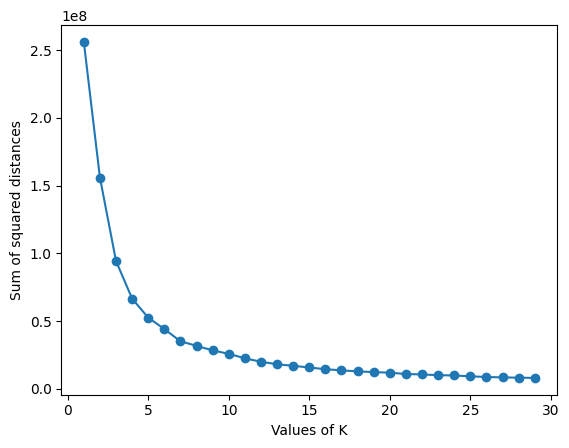

In [10]:
Sum_of_squared_distances = []
clusters = range(1, 30)
data = d_277_2
path = "../figures/SSD_kmeans_215_3.png"
for n_clusters in clusters:
    km = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(clusters, Sum_of_squared_distances)
plt.scatter(clusters, Sum_of_squared_distances)
plt.xlabel("Values of K")
plt.ylabel("Sum of squared distances")
# plt.savefig(path, bbox_inches="tight")
plt.show()

# DBSCAN

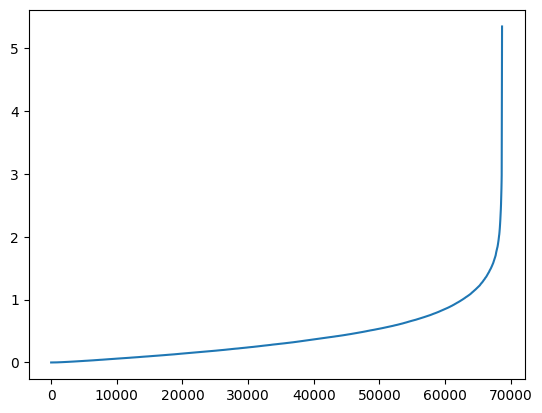

In [14]:
from sklearn.neighbors import NearestNeighbors
from matplotlib import pyplot as plt

neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(d_215_3)
distances, indices = neighbors_fit.kneighbors(d_215_3)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
# plt.savefig("../figures/knn_dbscan_215_3.png", bbox_inches="tight")